In [1]:
#Display all outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Fix minus sign rendering on axis ticks
plt.rcParams['axes.unicode_minus'] = False

# Fix Chinese font rendering issues
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'Hiragino Sans GB', 'Noto Sans CJK SC', 'SimHei']


# Import Data

In [2]:
data_00 = pd.read_csv('data/ma_resp_data_temp.csv')
feature_dict = pd.read_excel('Insurance Claims Data Dictionary.xlsx')
data_01 = data_00.copy()

# Explore Data

In [3]:
data_01.head()
data_01['STATE_NAME'].unique()


,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,201478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,...,32,13,36.0,15,65.0,9.0,NaN,37,4,3


array(['CA', 'IN', 'MO', 'CT', 'NY', 'KY', 'GA', 'OH', 'WI', 'NH', 'ME'],
      dtype=object)

In [4]:
feature_dict

,变量名,type,变量说明,备注
0,KBM_INDV_ID,Num,用户ID,无意义特征
1,resp_flag,Num,用户是否购买保险,响应变量，也就是我们的目标变量
2,age,Num,年龄,本产品为针对的65岁以上人群保险
3,GEND,Char,性别,NaN
4,c210mys,Num,学历,0-unknown; 1-初中；2-高中不到；3-高中毕业；4-大学未毕业；\n5-大专；6...
...,...,...,...,...
70,c210wht,Num,白领所占比例,值越大，说明比例越高
71,ilor,Num,所处地区居住年限,值越大，说明居住年限越长
72,tins,Num,该客户被多少个名单包含,NaN
73,pdpe,Num,所在地区处方药计划覆盖的比例,值越大，说明覆盖比例越高


## Handle Abnormal Column Labels

The fields in the table do not match the data dictionary.

Check whether all column labels in `data_01` appear in the variable names of the data dictionary.

In [5]:
data_01.columns
len(data_01.columns)

Index(['KBM_INDV_ID', 'resp_flag', 'GEND', 'CA00', 'CA03', 'CA06', 'CA11',
       'CA16', 'AART', 'ADBT', 'ADEP', 'AHBP', 'AHCH', 'ARES', 'AHRT', 'AASN',
       'ADGS', 'AHRL', 'ASKN', 'AVIS', 'BANK', 'COLLEGE', 'FINI', 'INLI',
       'INMEDI', 'INVE', 'IOLP', 'MOBPLUS', 'N2NCY', 'NY8Y9', 'N2N29', 'N3N39',
       'N4N49', 'N5N59', 'N6N64', 'N65P', 'ONLA', 'POEP', 'SGFA', 'SGLL',
       'SGOE', 'SGSE', 'SGTC', 'U18', 'LIVEWELL', 'NOC19', 'NAH19', 'NPH19',
       'POC19', 'HOMSTAT', 'HINSUB', 'STATE_NAME', 'age', 'c210apvt',
       'c210b200', 'c210blu', 'c210bpvt', 'c210cip', 'c210ebi', 'c210hmi',
       'c210hva', 'c210kses', 'c210mah', 'c210mob', 'c210mys', 'c210pdv',
       'c210pmr', 'c210poo', 'c210psu', 'c210pwc', 'c210wht', 'ilor', 'meda',
       'pdpe', 'tins', 'zhip19'],
      dtype='object')

76

In [6]:
feature_dict.变量名

0     KBM_INDV_ID
1       resp_flag
2             age
3            GEND
4         c210mys
         ...     
70        c210wht
71           ilor
72           tins
73           pdpe
74         zhip19
Name: 变量名, Length: 75, dtype: object

In [7]:
#Compute symmetric difference
np.setxor1d(data_01.columns,feature_dict.变量名) 

array(['N1819', 'N2029', 'N2N29', 'N3039', 'N3N39', 'N4049', 'N4N49',
       'N5059', 'N5N59', 'N6064', 'N6N64', 'NY8Y9', 'meda'], dtype=object)

# Data Table Column Labels
NY8Y9', 'N2N29', 'N3N39', 'N4N49', 'N5N59', 'N6N64'

# Data Dictionary
'N1819', 'N2029','N3039','N4049', 'N5059','N6064'

meda

In [8]:
# Drop
data_01['meda'].nunique()

75

Replace Abnormal Labels

In [9]:
a = ['NY8Y9', 'N2N29', 'N3N39', 'N4N49', 'N5N59', 'N6N64']
b = ['N1819', 'N2029','N3039','N4049', 'N5059','N6064']
# Build a mapping dictionary for columns to replace
dic = dict(zip(a,b))
dic
# Replace abnormal column headers
data_01.columns = [dic.get(col, col) for col in data_01.columns]
data_01.head(1)

{'NY8Y9': 'N1819',
 'N2N29': 'N2029',
 'N3N39': 'N3039',
 'N4N49': 'N4049',
 'N5N59': 'N5059',
 'N6N64': 'N6064'}

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,201478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8


## Create a Custom Translation Function

Improve EDA efficiency by creating a custom translation function and replacing DataFrame column labels via a mapping dictionary.

In [10]:
dic = {k:v for k,v in feature_dict[['变量名','变量说明']].values.reshape(-1,2)}
dic
def chinese(x):
    y = x.copy()
    #Map incoming field names using the dictionary
    y.columns = [dic.get(col, col) for col in y.columns]
    return y

{'KBM_INDV_ID': '用户ID',
 'resp_flag': '用户是否购买保险',
 'age': '年龄',
 'GEND': '性别',
 'c210mys': '学历',
 'POC19': '是否有小孩',
 'CA00': '小孩是否在0-2岁之间',
 'CA03': '小孩是否在3-5岁之间',
 'CA06': '小孩是否在6-10岁之间',
 'CA11': '小孩是否在11-15岁之间',
 'CA16': '小孩是否在16-18岁之间',
 'NOC19': '家庭小孩个数',
 'NAH19': '家庭成年人个数',
 'NPH19': '家庭成员人数量',
 'U18': '是否有家庭成员小于18岁',
 'N1819': '是否有家庭成员在18-19岁之间',
 'N2029': '是否有家庭成员在20-29岁之间',
 'N3039': '是否有家庭成员在30-39岁之间',
 'N4049': '是否有家庭成员在40-49岁之间',
 'N5059': '是否有家庭成员在50-59岁之间',
 'N6064': '是否有家庭成员在60-64岁之间',
 'N65P': '是否有家庭成员在65岁以上',
 'POEP': '家里是否有老人',
 'AART': '是否有关节炎',
 'ADBT': '是否有糖尿病',
 'ADEP': '是否有抑郁症',
 'AHBP': '是否有高血压',
 'AHCH': '胆固醇含量是否过高',
 'ARES': '是否有呼吸疾病',
 'AHRT': '是否有心脏病',
 'AASN': '是否有过敏性鼻炎',
 'ADGS': '是否有消化不良',
 'AHRL': '是否耳聋',
 'ASKN': '是否有皮肤病',
 'AVIS': '是否视力不好',
 'BANK': '是否有过破产记录',
 'COLLEGE': '是否大学毕业',
 'FINI': '是否用过保险服务',
 'INLI': '是否投资过寿险',
 'INMEDI': '是否购买过医疗险',
 'INVE': '是否有投资',
 'IOLP': '是否网上购买过产品',
 'MOBPLUS': '是否通过快递买过东西',
 'N2NCY': '所处的县的大小',
 'ONLA': '是否上网',
 'S

In [11]:
chinese(data_01).head()

,用户ID,用户是否购买保险,性别,小孩是否在0-2岁之间,小孩是否在3-5岁之间,小孩是否在6-10岁之间,小孩是否在11-15岁之间,小孩是否在16-18岁之间,是否有关节炎,是否有糖尿病,...,已婚人群所占比例,有房子人所占比例,独宅住户所占比例,有小孩的家庭所占比例,白领所占比例,所处地区居住年限,meda,所在地区处方药计划覆盖的比例,该客户被多少个名单包含,所处地区的家庭收入排名
0,201478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,...,32,13,36.0,15,65.0,9.0,NaN,37,4,3


## Explore Basic User Information

In [12]:
feature_dict.变量名[:5]

0    KBM_INDV_ID
1      resp_flag
2            age
3           GEND
4        c210mys
Name: 变量名, dtype: object

In [13]:
feature_dict.变量名[:5].tolist() #Convert to list

['KBM_INDV_ID', 'resp_flag', 'age', 'GEND', 'c210mys']

In [14]:
data_01[feature_dict.变量名[:5]].head()

,KBM_INDV_ID,resp_flag,age,GEND,c210mys
0,201478,0,67.0,M,5
1,290485,0,76.0,M,4
2,299949,0,67.0,F,4
3,314635,0,71.0,F,4
4,363702,0,75.0,F,4


In [15]:
#Select columns 0_4 and translate labels
data0_4 = chinese(data_01[feature_dict.变量名[:5]])
data0_4.head()

,用户ID,用户是否购买保险,年龄,性别,学历
0,201478,0,67.0,M,5
1,290485,0,76.0,M,4
2,299949,0,67.0,F,4
3,314635,0,71.0,F,4
4,363702,0,75.0,F,4


In [16]:
data0_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   用户ID      43666 non-null  int64  
 1   用户是否购买保险  43666 non-null  int64  
 2   年龄        43662 non-null  float64
 3   性别        43666 non-null  object 
 4   学历        43666 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ MB


In [17]:
data0_4.isnull().sum()

用户ID        0
用户是否购买保险    0
年龄          4
性别          0
学历          0
dtype: int64

### Custom Function for Feature Frequency Exploration

Input a DataFrame and output the frequency distribution of each feature.

In [18]:
def fre(x):
    for i in x.columns:
        print("字段名:",i)
        print("----------")
        print("字段数据类型:",x[i].dtype)
        print("----------------------------")
        print(x[i].value_counts()) #Frequency
        print("----------------------------")
        print("缺失值的个数:",x[i].isnull().sum())
        print("------------------------------------------------\n\n")

In [19]:
fre(data0_4)

字段名: 用户ID
----------
字段数据类型: int64
----------------------------
用户ID
201478       1
161477557    1
161467769    1
161468365    1
161469379    1
            ..
178046930    1
178050805    1
178052228    1
178052468    1
408979600    1
Name: count, Length: 43666, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 用户是否购买保险
----------
字段数据类型: int64
----------------------------
用户是否购买保险
0    26177
1    17489
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 年龄
----------
字段数据类型: float64
----------------------------
年龄
66.0     3967
67.0     3670
65.0     3475
69.0     3449
68.0     3423
70.0     2948
71.0     2943
72.0     2909
74.0     2817
73.0     2814
75.0     2448
76.0     2220
78.0     2038
77.0     2012
79.0     1823
80.0      691
88.0        2
86.0        2
91.0        2
99.0        1
101.0       1
82.0        1
95.0        1
98.0        1
96.0        1
94.

In [20]:
data0_4

,用户ID,用户是否购买保险,年龄,性别,学历
0,201478,0,67.0,M,5
1,290485,0,76.0,M,4
2,299949,0,67.0,F,4
3,314635,0,71.0,F,4
4,363702,0,75.0,F,4
...,...,...,...,...,...
43661,408977775,1,65.0,F,4
43662,408977955,1,70.0,F,4
43663,408978092,1,65.0,M,6
43664,408978770,1,75.0,M,4


<Figure size 600x200 with 0 Axes>

<Axes: ylabel='用户是否购买保险'>

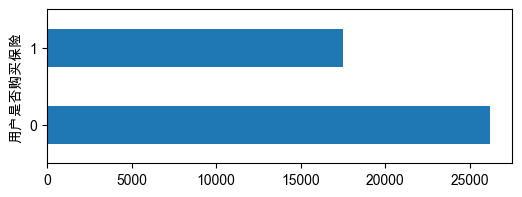

In [21]:
plt.figure(1,figsize=(6,2))
data0_4['用户是否购买保险'].value_counts().plot.barh()
plt.show()

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

(60.0, 90.0)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Density')

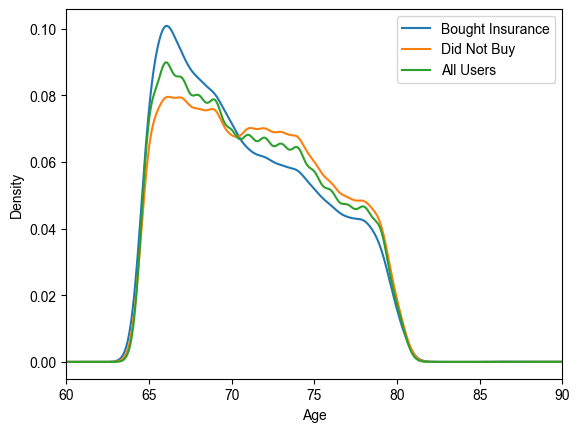

In [22]:
data0_4.年龄[data0_4.用户是否购买保险==1].plot(kind='density', label='Bought Insurance')
data0_4.年龄[data0_4.用户是否购买保险==0].plot(kind='density', label='Did Not Buy')
data0_4.年龄.dropna().plot(kind='density', label='All Users')
plt.xlim([60,90])
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


## Explore Household Member Features

In [23]:
#Select columns 5_22 and translate labels
data5_22 = chinese(data_01[feature_dict.变量名[5:23].tolist()])
data5_22.head()

,是否有小孩,小孩是否在0-2岁之间,小孩是否在3-5岁之间,小孩是否在6-10岁之间,小孩是否在11-15岁之间,小孩是否在16-18岁之间,家庭小孩个数,家庭成年人个数,家庭成员人数量,是否有家庭成员小于18岁,是否有家庭成员在18-19岁之间,是否有家庭成员在20-29岁之间,是否有家庭成员在30-39岁之间,是否有家庭成员在40-49岁之间,是否有家庭成员在50-59岁之间,是否有家庭成员在60-64岁之间,是否有家庭成员在65岁以上,家里是否有老人
0,Y,4,0,5,1,1,5,3,8,N,N,N,Y,N,N,Y,Y,Y
1,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N
2,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N
3,Y,0,4,0,0,0,1,4,5,N,N,N,N,Y,Y,N,Y,Y
4,U,0,0,0,0,0,0,1,1,N,N,N,N,N,N,N,Y,N


In [24]:
fre(data5_22)

字段名: 是否有小孩
----------
字段数据类型: object
----------------------------
是否有小孩
U    24500
Y    10225
P     8941
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 小孩是否在0-2岁之间
----------
字段数据类型: int64
----------------------------
小孩是否在0-2岁之间
0    40677
4     2856
1       57
2       48
3       16
6        9
5        3
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 小孩是否在3-5岁之间
----------
字段数据类型: int64
----------------------------
小孩是否在3-5岁之间
0    41087
4     2068
1      204
2      202
3       45
5       30
6       29
7        1
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 小孩是否在6-10岁之间
----------
字段数据类型: int64
----------------------------
小孩是否在6-10岁之间
0    38969
4     2960
1      553
2      528
6      240
5      209
3      176
7       31
Name: count, dtype: int64
-----------------

## Explore Disease-Related Features

In [25]:
#Select columns 23_35 and translate labels
data23_35 = chinese(data_01[feature_dict.变量名[23:35].tolist()])
data23_35.head()

,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有高血压,胆固醇含量是否过高,是否有呼吸疾病,是否有心脏病,是否有过敏性鼻炎,是否有消化不良,是否耳聋,是否有皮肤病,是否视力不好
0,N,N,N,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,N,N,N,N
2,N,N,N,N,N,N,N,N,N,N,N,N
3,N,N,N,N,N,N,N,N,N,N,N,N
4,N,N,N,N,N,N,N,N,N,N,N,N


In [26]:
fre(data23_35)

字段名: 是否有关节炎
----------
字段数据类型: object
----------------------------
是否有关节炎
N    38369
Y     5297
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否有糖尿病
----------
字段数据类型: object
----------------------------
是否有糖尿病
N    40554
Y     3112
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否有抑郁症
----------
字段数据类型: object
----------------------------
是否有抑郁症
N    41674
Y     1992
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否有高血压
----------
字段数据类型: object
----------------------------
是否有高血压
N    38102
Y     5564
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 胆固醇含量是否过高
----------
字段数据类型: object
----------------------------
胆固醇含量是否过高
N    37395
Y     6271
Name: count, dtype: int64
------------------------

In [27]:
#0-1 encoding
def zero_one(x):
    for i in x.columns:
        if x[i].dtype == 'object':
            dic = dict(zip(list(x[i].value_counts().index),range(x[i].nunique())))
            x[i] = x[i].map(dic)
    return x
dd = zero_one(data23_35)

In [28]:
zero_one(data23_35).corr()

,是否有关节炎,是否有糖尿病,是否有抑郁症,是否有高血压,胆固醇含量是否过高,是否有呼吸疾病,是否有心脏病,是否有过敏性鼻炎,是否有消化不良,是否耳聋,是否有皮肤病,是否视力不好
是否有关节炎,1.000000,0.446458,0.414955,0.632994,0.638905,0.478167,0.403263,0.669722,0.670945,0.356717,0.432069,0.570546
是否有糖尿病,0.446458,1.000000,0.306319,0.499331,0.485837,0.341276,0.360596,0.447038,0.453943,0.273800,0.283378,0.386641
是否有抑郁症,0.414955,0.306319,1.000000,0.393726,0.403696,0.379312,0.315257,0.411868,0.432201,0.275739,0.303972,0.346339
是否有高血压,0.632994,0.499331,0.393726,1.000000,0.719111,0.441706,0.436309,0.648784,0.651767,0.348651,0.397823,0.562810
胆固醇含量是否过高,0.638905,0.485837,0.403696,0.719111,1.000000,0.446039,0.426180,0.681824,0.690814,0.353627,0.413284,0.633716
是否有呼吸疾病,0.478167,0.341276,0.379312,0.441706,0.446039,1.000000,0.315187,0.497713,0.483421,0.282426,0.336810,0.414359
是否有心脏病,0.403263,0.360596,0.315257,0.436309,0.426180,0.315187,1.000000,0.372830,0.381817,0.348280,0.208320,0.269672
是否有过敏性鼻炎,0.669722,0.447038,0.411868,0.648784,0.681824,0.497713,0.372830,1.000000,0.732883,0.357085,0.484138,0.640638
是否有消化不良,0.670945,0.453943,0.432201,0.651767,0.690814,0.483421,0.381817,0.732883,1.000000,0.355564,0.450049,0.639802
是否耳聋,0.356717,0.273800,0.275739,0.348651,0.353627,0.282426,0.348280,0.357085,0.355564,1.000000,0.219128,0.274512


([<matplotlib.axis.XTick at 0x115c6a0d0>,
 [Text(0, 0, '是否有关节炎'),
  Text(1, 0, '是否有糖尿病'),
  Text(2, 0, '是否有抑郁症'),
  Text(3, 0, '是否有高血压'),
  Text(4, 0, '胆固醇含量是否过高'),
  Text(5, 0, '是否有呼吸疾病'),
  Text(6, 0, '是否有心脏病'),
  Text(7, 0, '是否有过敏性鼻炎'),
  Text(8, 0, '是否有消化不良'),
  Text(9, 0, '是否耳聋'),
  Text(10, 0, '是否有皮肤病'),
  Text(11, 0, '是否视力不好')])

([<matplotlib.axis.YTick at 0x115c6a850>,
 [Text(0, 0, '是否有关节炎'),
  Text(0, 1, '是否有糖尿病'),
  Text(0, 2, '是否有抑郁症'),
  Text(0, 3, '是否有高血压'),
  Text(0, 4, '胆固醇含量是否过高'),
  Text(0, 5, '是否有呼吸疾病'),
  Text(0, 6, '是否有心脏病'),
  Text(0, 7, '是否有过敏性鼻炎'),
  Text(0, 8, '是否有消化不良'),
  Text(0, 9, '是否耳聋'),
  Text(0, 10, '是否有皮肤病'),
  Text(0, 11, '是否视力不好')])

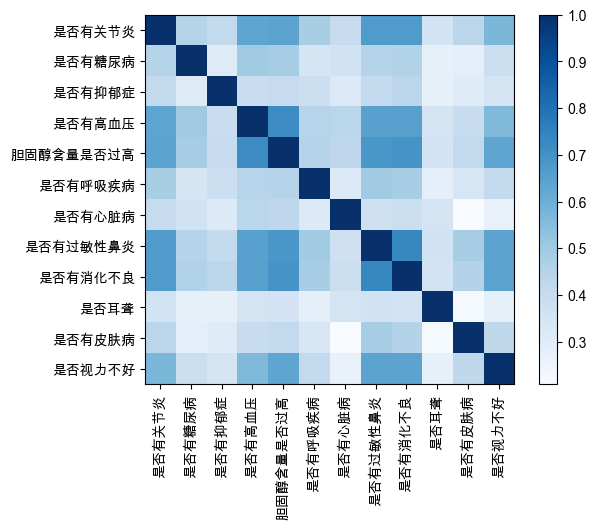

In [29]:
# zero_one(data23_35).corr().plot.heatmap()

corr_df = zero_one(data23_35).corr()
plt.imshow(corr_df, 
           cmap='Blues',    # Color map options https://matplotlib.org/stable/tutorials/colors/colormaps.html
           )
plt.colorbar()
plt.xticks(np.arange(len(corr_df.index)),corr_df.index, rotation=90, fontsize=10)
plt.yticks(np.arange(len(corr_df.index)),corr_df.columns, fontsize=10)

### Custom Function to Filter Features Above a Correlation Threshold

Filter features with correlation above 0.65.

In [30]:
def higt_cor(x,y=0.65):
    data_cor = (x.corr()>y)
    print(data_cor)
    a=[]
    for i in data_cor.columns:
        if data_cor[i].sum()>=2:
            a.append([i,x.corr()[i].mean()])

    return a  #These fields are candidates for removal

In [31]:
higt_cor(data23_35)

           是否有关节炎  是否有糖尿病  是否有抑郁症  是否有高血压  胆固醇含量是否过高  是否有呼吸疾病  是否有心脏病  \
是否有关节炎       True   False   False   False      False    False   False   
是否有糖尿病      False    True   False   False      False    False   False   
是否有抑郁症      False   False    True   False      False    False   False   
是否有高血压      False   False   False    True       True    False   False   
胆固醇含量是否过高   False   False   False    True       True    False   False   
是否有呼吸疾病     False   False   False   False      False     True   False   
是否有心脏病      False   False   False   False      False    False    True   
是否有过敏性鼻炎     True   False   False   False       True    False   False   
是否有消化不良      True   False   False    True       True    False   False   
是否耳聋        False   False   False   False      False    False   False   
是否有皮肤病      False   False   False   False      False    False   False   
是否视力不好      False   False   False   False      False    False   False   

           是否有过敏性鼻炎  是否有消化不良   是否耳聋  是否有皮肤病  是否视力不

[['是否有关节炎', np.float64(0.5595619028171446)],
 ['是否有高血压', np.float64(0.5610843063734482)],
 ['胆固醇含量是否过高', np.float64(0.5744195831370256)],
 ['是否有过敏性鼻炎', np.float64(0.5787102443420652)],
 ['是否有消化不良', np.float64(0.5786005226486616)]]

## Explore Investment-Related Features

In [32]:
#Select columns 35_41 and translate labels
data35_41 = chinese(data_01[feature_dict.变量名[35:41].tolist()])
data35_41.head()

,是否有过破产记录,是否大学毕业,是否用过保险服务,是否投资过寿险,是否购买过医疗险,是否有投资
0,N,N,N,N,N,N
1,N,N,N,N,N,N
2,N,N,N,N,N,N
3,Y,N,N,N,N,N
4,N,Y,N,N,N,N


In [33]:
fre(data35_41)

字段名: 是否有过破产记录
----------
字段数据类型: object
----------------------------
是否有过破产记录
N    40599
Y     3067
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否大学毕业
----------
字段数据类型: object
----------------------------
是否大学毕业
N    39236
Y     4422
Name: count, dtype: int64
----------------------------
缺失值的个数: 8
------------------------------------------------


字段名: 是否用过保险服务
----------
字段数据类型: object
----------------------------
是否用过保险服务
N    42793
Y      873
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否投资过寿险
----------
字段数据类型: object
----------------------------
是否投资过寿险
N    35871
Y     7795
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否购买过医疗险
----------
字段数据类型: object
----------------------------
是否购买过医疗险
N    40016
Y     3650
Name: count, dtype: int64
----------------

([<matplotlib.axis.XTick at 0x115d6b4d0>,
 [Text(0, 0, '是否有过破产记录'),
  Text(1, 0, '是否大学毕业'),
  Text(2, 0, '是否用过保险服务'),
  Text(3, 0, '是否投资过寿险'),
  Text(4, 0, '是否购买过医疗险'),
  Text(5, 0, '是否有投资')])

([<matplotlib.axis.YTick at 0x115d6bc50>,
 [Text(0, 0, '是否有过破产记录'),
  Text(0, 1, '是否大学毕业'),
  Text(0, 2, '是否用过保险服务'),
  Text(0, 3, '是否投资过寿险'),
  Text(0, 4, '是否购买过医疗险'),
  Text(0, 5, '是否有投资')])

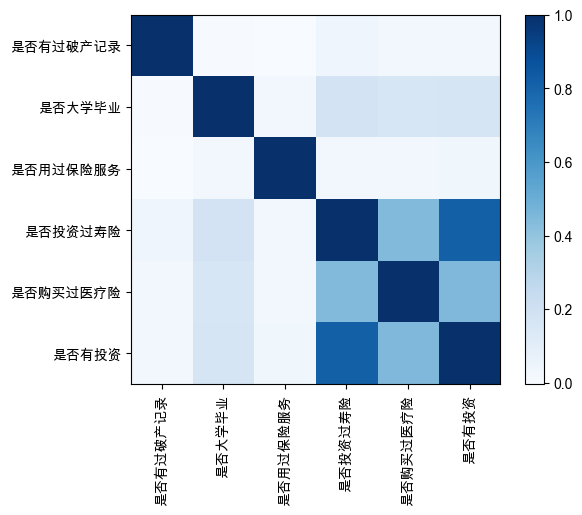

In [34]:
corr_df = zero_one(data35_41).corr()
plt.imshow(corr_df, 
           cmap='Blues',    # Color map options https://matplotlib.org/stable/tutorials/colors/colormaps.html
           )
plt.colorbar()
plt.xticks(np.arange(len(corr_df.index)),corr_df.index, rotation=90, fontsize=10)
plt.yticks(np.arange(len(corr_df.index)),corr_df.columns, fontsize=10)

In [35]:
higt_cor(data35_41)

          是否有过破产记录  是否大学毕业  是否用过保险服务  是否投资过寿险  是否购买过医疗险  是否有投资
是否有过破产记录      True   False     False    False     False  False
是否大学毕业       False    True     False    False     False  False
是否用过保险服务     False   False      True    False     False  False
是否投资过寿险      False   False     False     True     False   True
是否购买过医疗险     False   False     False    False      True  False
是否有投资        False   False     False     True     False   True


[['是否投资过寿险', np.float64(0.41622919058623675)],
 ['是否有投资', np.float64(0.4137703083616686)]]

## Explore Lifestyle Features

In [36]:
#Select columns 41_51 and translate labels
data41_51 = chinese(data_01[feature_dict.变量名[41:51].tolist()])
data41_51.head()

,是否网上购买过产品,是否通过快递买过东西,所处的县的大小,是否上网,是否喜欢美术,是否经常有奢侈消费,是否经常户外活动,是否喜欢运动,是否热爱科技,幸福指数
0,N,S,A,Y,N,N,N,N,N,1.0
1,N,P,A,N,N,N,N,N,N,4.0
2,N,M,A,Y,N,N,N,N,N,3.0
3,N,S,B,Y,N,N,N,N,N,1.0
4,Y,M,B,Y,Y,Y,N,Y,Y,3.0


In [37]:
fre(data41_51)

字段名: 是否网上购买过产品
----------
字段数据类型: object
----------------------------
是否网上购买过产品
N    36197
Y     7469
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否通过快递买过东西
----------
字段数据类型: object
----------------------------
是否通过快递买过东西
M    27450
S     9947
U     3912
P     2350
Name: count, dtype: int64
----------------------------
缺失值的个数: 7
------------------------------------------------


字段名: 所处的县的大小
----------
字段数据类型: object
----------------------------
所处的县的大小
A    26539
B    12687
C     3823
D      607
Name: count, dtype: int64
----------------------------
缺失值的个数: 10
------------------------------------------------


字段名: 是否上网
----------
字段数据类型: object
----------------------------
是否上网
Y    28473
N    15193
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 是否喜欢美术
----------
字段数据类型: object
----------------------------
是否喜欢美术
N    37029
Y     6637

<Axes: xlabel='N2NCY'>

Text(0.5, 0, '县的大小')

Text(0, 0.5, '购买数量')

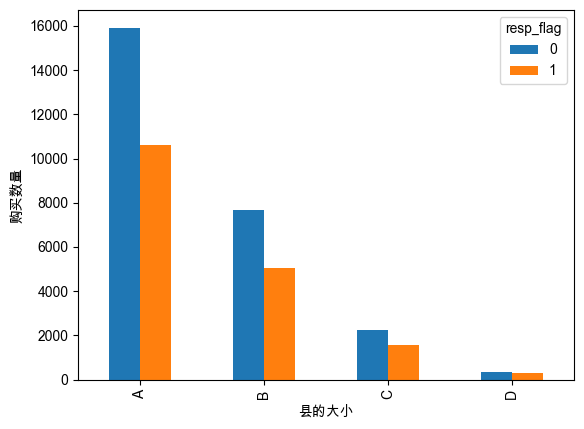

In [38]:
# Draw countplot based on x and hue columns
data_01.groupby(['N2NCY', 'resp_flag']).size().unstack().plot(kind='bar', stacked=False)
plt.xlabel('县的大小')
plt.ylabel('购买数量')

## Explore Household Income

In [39]:
#Select columns 51_59 and translate labels
data51_59 = chinese(data_01[feature_dict.变量名[51:59].tolist()])
data51_59.head()

,是否有房子,是否有医保补贴,收入所处排名,普查家庭有效购买收入,家庭收入,家庭房屋价值,社会经济地位评分,家庭自成立日起的时间
0,Y,C,74.0,71,90.0,738.0,111,64.0
1,Y,U,69.0,69,84.0,494.0,97,56.0
2,Y,U,32.0,44,50.0,516.0,83,50.0
3,Y,C,82.0,82,103.0,473.0,105,52.0
4,U,A,38.0,47,55.0,523.0,89,50.0


In [40]:
fre(data51_59)

字段名: 是否有房子
----------
字段数据类型: object
----------------------------
是否有房子
Y    31478
U     4747
P     4604
R     2623
T      204
Name: count, dtype: int64
----------------------------
缺失值的个数: 10
------------------------------------------------


字段名: 是否有医保补贴
----------
字段数据类型: object
----------------------------
是否有医保补贴
U    21612
C     8972
A     6765
B     6306
Name: count, dtype: int64
----------------------------
缺失值的个数: 11
------------------------------------------------


字段名: 收入所处排名
----------
字段数据类型: float64
----------------------------
收入所处排名
79.0    713
61.0    648
55.0    647
82.0    636
88.0    607
       ... 
25.0    258
46.0    254
17.0    246
23.0    225
42.0    162
Name: count, Length: 99, dtype: int64
----------------------------
缺失值的个数: 2
------------------------------------------------


字段名: 普查家庭有效购买收入
----------
字段数据类型: int64
----------------------------
普查家庭有效购买收入
48     1034
45      994
44      980
47      967
49      957
       ... 
243       1
230       1
178    

([<matplotlib.axis.XTick at 0x115ecee90>,
 [Text(0, 0, '是否有房子'),
  Text(1, 0, '是否有医保补贴'),
  Text(2, 0, '收入所处排名'),
  Text(3, 0, '普查家庭有效购买收入'),
  Text(4, 0, '家庭收入'),
  Text(5, 0, '家庭房屋价值'),
  Text(6, 0, '社会经济地位评分'),
  Text(7, 0, '家庭自成立日起的时间')])

([<matplotlib.axis.YTick at 0x115ecf610>,
 [Text(0, 0, '是否有房子'),
  Text(0, 1, '是否有医保补贴'),
  Text(0, 2, '收入所处排名'),
  Text(0, 3, '普查家庭有效购买收入'),
  Text(0, 4, '家庭收入'),
  Text(0, 5, '家庭房屋价值'),
  Text(0, 6, '社会经济地位评分'),
  Text(0, 7, '家庭自成立日起的时间')])

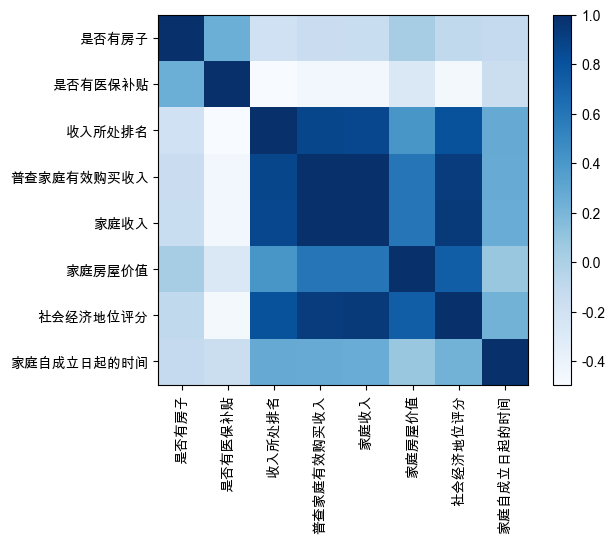

In [41]:
corr_df = zero_one(data51_59).corr()
plt.imshow(corr_df, 
           cmap='Blues',    # Color map options https://matplotlib.org/stable/tutorials/colors/colormaps.html
           )
plt.colorbar()
plt.xticks(np.arange(len(corr_df.index)),corr_df.index, rotation=90, fontsize=10)
plt.yticks(np.arange(len(corr_df.index)),corr_df.columns, fontsize=10)

In [42]:
higt_cor(data51_59)

            是否有房子  是否有医保补贴  收入所处排名  普查家庭有效购买收入   家庭收入  家庭房屋价值  社会经济地位评分  \
是否有房子        True    False   False       False  False   False     False   
是否有医保补贴     False     True   False       False  False   False     False   
收入所处排名      False    False    True        True   True   False      True   
普查家庭有效购买收入  False    False    True        True   True   False      True   
家庭收入        False    False    True        True   True   False      True   
家庭房屋价值      False    False   False       False  False    True      True   
社会经济地位评分    False    False    True        True   True    True      True   
家庭自成立日起的时间  False    False   False       False  False   False     False   

            家庭自成立日起的时间  
是否有房子            False  
是否有医保补贴          False  
收入所处排名           False  
普查家庭有效购买收入       False  
家庭收入             False  
家庭房屋价值           False  
社会经济地位评分         False  
家庭自成立日起的时间        True  


[['收入所处排名', np.float64(0.4398932592334104)],
 ['普查家庭有效购买收入', np.float64(0.5044655598679655)],
 ['家庭收入', np.float64(0.5062826976735524)],
 ['家庭房屋价值', np.float64(0.3961938057033559)],
 ['社会经济地位评分', np.float64(0.5077671562993784)]]

## Explore Regional Features

In [43]:
#Select columns from index 59 onward and translate labels
data59 = chinese(data_01[feature_dict.变量名[59:].tolist()])
data59.head()

,所处的省份,贫穷以上人的比例,所处地区有多少居住小区在2000年及以后建立,所处地区蓝领所占百分比,贫穷以下人的比例,所处地区移动房屋的比例,离婚或者分居人群所占比例,已婚人群所占比例,有房子人所占比例,独宅住户所占比例,有小孩的家庭所占比例,白领所占比例,所处地区居住年限,该客户被多少个名单包含,所在地区处方药计划覆盖的比例,所处地区的家庭收入排名
0,CA,99,11.0,10,1,0,14,52,65,71.0,22,79.0,15.0,8,42,8
1,CA,98,6.0,15,2,0,15,44,81,99.0,37,65.0,17.0,6,46,3
2,CA,88,NaN,26,12,0,17,38,44,62.0,44,47.0,20.0,7,46,3
3,CA,96,NaN,15,4,0,14,45,71,99.0,39,71.0,4.0,8,37,9
4,CA,88,NaN,9,12,10,29,32,13,36.0,15,65.0,9.0,4,37,3


In [44]:
fre(data59)

字段名: 所处的省份
----------
字段数据类型: object
----------------------------
所处的省份
CA    11700
OH     8959
NY     6481
IN     4954
CT     2873
MO     2202
WI     1884
GA     1687
KY     1375
NH      904
ME      647
Name: count, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 贫穷以上人的比例
----------
字段数据类型: int64
----------------------------
贫穷以上人的比例
99    4081
98    3624
97    3440
96    3307
95    2885
      ... 
7        1
25       1
35       1
17       1
22       1
Name: count, Length: 81, dtype: int64
----------------------------
缺失值的个数: 0
------------------------------------------------


字段名: 所处地区有多少居住小区在2000年及以后建立
----------
字段数据类型: float64
----------------------------
所处地区有多少居住小区在2000年及以后建立
4.0     2467
2.0     2401
3.0     2364
5.0     2317
1.0     2305
        ... 
99.0       5
95.0       4
90.0       4
86.0       3
94.0       2
Name: count, Length: 100, dtype: int64
----------------------------
缺失值的个数: 5
--------------------------

<Axes: xlabel='STATE_NAME'>

Text(0.5, 0, '所处的省份')

Text(0, 0.5, '购买数量')

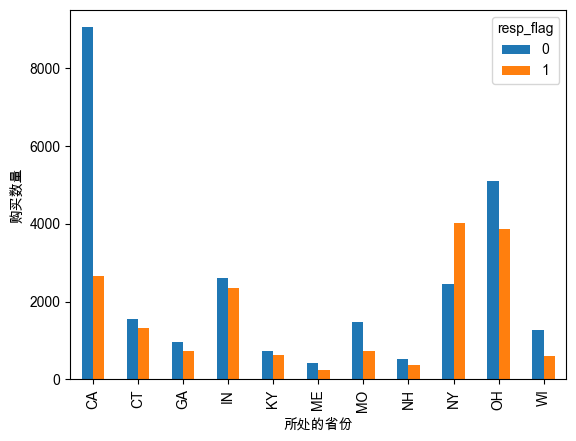

In [45]:
data_01.groupby(['STATE_NAME', 'resp_flag']).size().unstack().plot(kind='bar', stacked=False)
plt.xlabel('所处的省份')
plt.ylabel('购买数量')

([<matplotlib.axis.XTick at 0x116069a90>,
 [Text(0, 0, '贫穷以上人的比例'),
  Text(1, 0, '所处地区蓝领所占百分比'),
  Text(2, 0, '贫穷以下人的比例'),
  Text(3, 0, '所处地区移动房屋的比例'),
  Text(4, 0, '白领所占比例'),
  Text(5, 0, '所处地区的家庭收入排名')])

([<matplotlib.axis.YTick at 0x11606a210>,
 [Text(0, 0, '贫穷以上人的比例'),
  Text(0, 1, '所处地区蓝领所占百分比'),
  Text(0, 2, '贫穷以下人的比例'),
  Text(0, 3, '所处地区移动房屋的比例'),
  Text(0, 4, '白领所占比例'),
  Text(0, 5, '所处地区的家庭收入排名')])

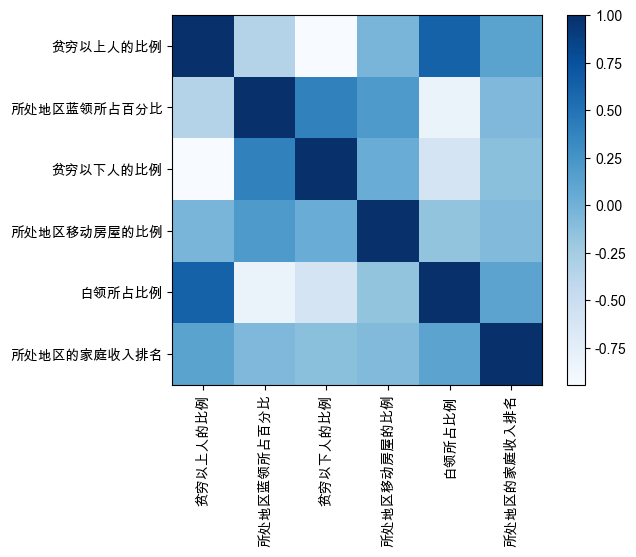

In [46]:
a = chinese(data_01[["c210apvt","c210blu","c210bpvt","c210mob","c210wht","zhip19"]])
corr_df = a.corr()
plt.imshow(corr_df, 
           cmap='Blues',    # Color map options https://matplotlib.org/stable/tutorials/colors/colormaps.html
           )
plt.colorbar()
plt.xticks(np.arange(len(corr_df.index)),corr_df.index, rotation=90, fontsize=10)
plt.yticks(np.arange(len(corr_df.index)),corr_df.columns, fontsize=10)

In [47]:
print(data59.columns)
del data59["所处的省份"]
higt_cor(data59)

Index(['所处的省份', '贫穷以上人的比例', '所处地区有多少居住小区在2000年及以后建立', '所处地区蓝领所占百分比',
       '贫穷以下人的比例', '所处地区移动房屋的比例', '离婚或者分居人群所占比例', '已婚人群所占比例', '有房子人所占比例',
       '独宅住户所占比例', '有小孩的家庭所占比例', '白领所占比例', '所处地区居住年限', '该客户被多少个名单包含',
       '所在地区处方药计划覆盖的比例', '所处地区的家庭收入排名'],
      dtype='object')
                        贫穷以上人的比例  所处地区有多少居住小区在2000年及以后建立  所处地区蓝领所占百分比  \
贫穷以上人的比例                    True                   False        False   
所处地区有多少居住小区在2000年及以后建立     False                    True        False   
所处地区蓝领所占百分比                False                   False         True   
贫穷以下人的比例                   False                   False        False   
所处地区移动房屋的比例                False                   False        False   
离婚或者分居人群所占比例               False                   False        False   
已婚人群所占比例                    True                   False        False   
有房子人所占比例                   False                   False        False   
独宅住户所占比例                   False                   False        Fal

[['贫穷以上人的比例', np.float64(0.12125523387829153)],
 ['已婚人群所占比例', np.float64(0.18736880474447792)],
 ['有房子人所占比例', np.float64(0.2209970966891868)],
 ['独宅住户所占比例', np.float64(0.20956765890110102)]]

([<matplotlib.axis.XTick at 0x11613ccd0>,
 [Text(0, 0, '贫穷以上人的比例'),
  Text(1, 0, '所处地区有多少居住小区在2000年及以后建立'),
  Text(2, 0, '所处地区蓝领所占百分比'),
  Text(3, 0, '贫穷以下人的比例'),
  Text(4, 0, '所处地区移动房屋的比例'),
  Text(5, 0, '离婚或者分居人群所占比例'),
  Text(6, 0, '已婚人群所占比例'),
  Text(7, 0, '有房子人所占比例'),
  Text(8, 0, '独宅住户所占比例'),
  Text(9, 0, '有小孩的家庭所占比例'),
  Text(10, 0, '白领所占比例'),
  Text(11, 0, '所处地区居住年限'),
  Text(12, 0, '该客户被多少个名单包含'),
  Text(13, 0, '所在地区处方药计划覆盖的比例'),
  Text(14, 0, '所处地区的家庭收入排名')])

([<matplotlib.axis.YTick at 0x11613d450>,
 [Text(0, 0, '贫穷以上人的比例'),
  Text(0, 1, '所处地区有多少居住小区在2000年及以后建立'),
  Text(0, 2, '所处地区蓝领所占百分比'),
  Text(0, 3, '贫穷以下人的比例'),
  Text(0, 4, '所处地区移动房屋的比例'),
  Text(0, 5, '离婚或者分居人群所占比例'),
  Text(0, 6, '已婚人群所占比例'),
  Text(0, 7, '有房子人所占比例'),
  Text(0, 8, '独宅住户所占比例'),
  Text(0, 9, '有小孩的家庭所占比例'),
  Text(0, 10, '白领所占比例'),
  Text(0, 11, '所处地区居住年限'),
  Text(0, 12, '该客户被多少个名单包含'),
  Text(0, 13, '所在地区处方药计划覆盖的比例'),
  Text(0, 14, '所处地区的家庭收入排名')])

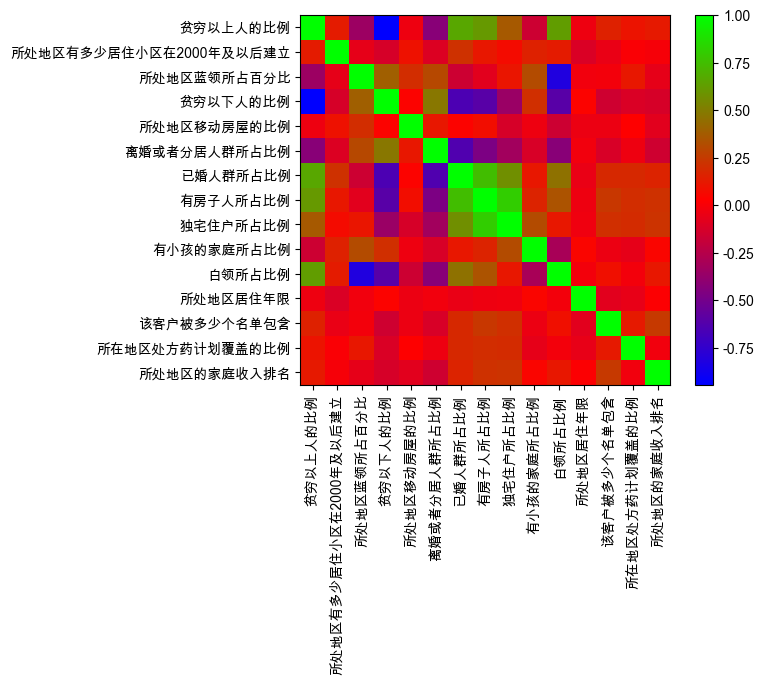

In [48]:
corr_df = data59.corr()
plt.imshow(corr_df, 
           cmap='brg',    # Color map options https://matplotlib.org/stable/tutorials/colors/colormaps.html
           )
plt.colorbar()
plt.xticks(np.arange(len(corr_df.index)),corr_df.index, rotation=90, fontsize=10)
plt.yticks(np.arange(len(corr_df.index)),corr_df.columns, fontsize=10)

# Data Cleaning

In [49]:
data_02 = data_01.copy()
data_02.shape

(43666, 76)

## Remove Features

In [50]:
del_col = ["KBM_INDV_ID","U18","POEP","AART","AHCH","AASN","COLLEGE",
 "INVE","c210cip","c210hmi","c210hva","c210kses","c210blu","c210bpvt","c210poo","KBM_INDV_ID","meda"]


In [51]:
data_02 = data_02.drop(columns=del_col)

In [52]:
data_02.shape

(43666, 60)

## Remove Duplicates

In [53]:
data_02.drop_duplicates().shape

(43666, 60)

## Split Training and Test Sets

Always split the dataset before imputation and encoding.

In [54]:
from sklearn.model_selection import train_test_split

y = data_02.pop('resp_flag') #Target
X = data_02  #Features

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=100)

In [55]:
Xtrain_01=Xtrain.copy()
Xtest_01=Xtest.copy()
Ytrain_01=Ytrain.copy()
Ytest_01=Ytest.copy()

## Fill Missing Values

### Median Imputation

In [56]:
fil = ["age","c210mah","c210b200","c210psu","c210wht","ilor"]

Xtrain_01[fil].median()

age         71.0
c210mah     53.0
c210b200    10.0
c210psu     77.0
c210wht     61.0
ilor        15.0
dtype: float64

In [57]:
dic = dict(zip(Xtrain_01[fil].median().index,Xtrain_01[fil].median()))
dic

{'age': 71.0,
 'c210mah': 53.0,
 'c210b200': 10.0,
 'c210psu': 77.0,
 'c210wht': 61.0,
 'ilor': 15.0}

In [58]:
#Fill training set with median values
Xtrain_01 = Xtrain_01.fillna(dic) 

### Mode Imputation

In [59]:
mod = ["N1819","ASKN","MOBPLUS","N2NCY","LIVEWELL","HOMSTAT","HINSUB"]

dic_mod = dict(zip(Xtrain_01[mod].mode().columns,Xtrain_01[mod].iloc[0,:]))

Xtrain_01 = Xtrain_01.fillna(dic_mod) 

### Replacement Imputation

In [60]:
Xtrain_01['N6064'] = Xtrain_01['N6064'].replace('0','N')  #0  replace with  N

In [61]:
Xtrain_01.isnull().sum()[Xtrain_01.isnull().sum()!=0]

Series([], dtype: int64)

### Test Set Imputation (Summary)

In [62]:
# Fields to impute
fil = ["age","c210mah","c210b200","c210psu","c210wht","ilor"]

#Median imputation -- test set

dic = dict(zip(Xtest_01[fil].median().index,Xtest_01[fil].median()))

Xtest_01 = Xtest_01.fillna(dic) 

# #Mode imputation -- test set
mod = ["N1819","ASKN","MOBPLUS","N2NCY","LIVEWELL","HOMSTAT","HINSUB"]

dic_mod = dict(zip(Xtest_01[mod].mode().columns,Xtest_01[mod].iloc[0,:]))

Xtest_01 = Xtest_01.fillna(dic_mod) 

# #Replacement imputation
Xtest_01['N6064'] = Xtest_01['N6064'].replace('0','N') 

Xtest_01.isnull().sum()[Xtest_01.isnull().sum() !=0]


Series([], dtype: int64)

# Encoding

In [63]:
encod_col = pd.read_excel('Insurance Claims Data Dictionary_Cleaned.xlsx')
encod_col = encod_col[encod_col["转"].notna()][["变量名","转"]]
encod_col.head()

,变量名,转
3,GEND,0-1
4,c210mys,哑变量
5,POC19,哑变量
15,N1819,0-1
16,N2029,0-1


In [64]:
# Check object-type columns in Xtrain_01
object_tr =Xtrain_01.describe(include='O').columns
object_tr

Index(['GEND', 'ADBT', 'ADEP', 'AHBP', 'ARES', 'AHRT', 'ADGS', 'AHRL', 'ASKN',
       'AVIS', 'BANK', 'FINI', 'INLI', 'INMEDI', 'IOLP', 'MOBPLUS', 'N2NCY',
       'N1819', 'N2029', 'N3039', 'N4049', 'N5059', 'N6064', 'N65P', 'ONLA',
       'SGFA', 'SGLL', 'SGOE', 'SGSE', 'SGTC', 'POC19', 'HOMSTAT', 'HINSUB',
       'STATE_NAME'],
      dtype='object')

In [65]:
#Check whether encoding targets are present
np.setdiff1d(object_tr,encod_col['变量名'])

array([], dtype=object)

## 0-1 Encoding

In [66]:
# Get variable names for 0-1 encoding
z_0_list = list(encod_col[encod_col['转']=='0-1'].变量名)
for i in del_col:
    if i in z_0_list:
        z_0_list.remove(i)
z_0_list

['GEND',
 'N1819',
 'N2029',
 'N3039',
 'N4049',
 'N5059',
 'N6064',
 'N65P',
 'ADBT',
 'ADEP',
 'AHBP',
 'ARES',
 'AHRT',
 'ADGS',
 'AHRL',
 'ASKN',
 'AVIS',
 'BANK',
 'FINI',
 'INLI',
 'INMEDI',
 'IOLP',
 'ONLA',
 'SGFA',
 'SGLL',
 'SGOE',
 'SGSE',
 'SGTC']

In [67]:
Xtrain_02 = Xtrain_01[z_0_list]
Xtrain_02.head()

,GEND,N1819,N2029,N3039,N4049,N5059,N6064,N65P,ADBT,ADEP,...,FINI,INLI,INMEDI,IOLP,ONLA,SGFA,SGLL,SGOE,SGSE,SGTC
18001,M,N,N,Y,Y,N,N,Y,N,N,...,N,N,N,N,Y,N,N,N,N,N
22763,F,N,N,N,N,N,Y,Y,N,N,...,N,N,N,Y,Y,Y,N,N,Y,Y
40488,F,N,N,N,N,Y,N,Y,N,N,...,N,Y,Y,Y,Y,Y,Y,Y,Y,Y
22585,F,N,N,N,N,N,N,Y,N,N,...,N,N,N,N,Y,N,N,N,N,N
12204,M,N,N,Y,N,Y,N,Y,N,N,...,N,N,N,N,Y,N,Y,N,Y,Y


In [68]:
#sklearn preprocessing module
from sklearn.preprocessing import OrdinalEncoder

#Use fit_transform directly
new_arr = OrdinalEncoder().fit_transform(Xtrain_02)
new_arr

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.]], shape=(30566, 28))

In [69]:
# Keep original columns and index
Xtrain_02 = pd.DataFrame(data=new_arr,columns=Xtrain_02.columns,index=Xtrain_02.index)
Xtrain_02.head()

,GEND,N1819,N2029,N3039,N4049,N5059,N6064,N65P,ADBT,ADEP,...,FINI,INLI,INMEDI,IOLP,ONLA,SGFA,SGLL,SGOE,SGSE,SGTC
18001,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22763,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
40488,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12204,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


Replace corresponding fields in `Xtrain_01` with 0-1 encoded variables from `Xtrain_02`.

In [70]:
Xtrain_01[z_0_list] = Xtrain_02

In [71]:
Xtrain_01.head()

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mys,c210pdv,c210pmr,c210psu,c210pwc,c210wht,ilor,pdpe,tins,zhip19
18001,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,4,15,56,75.0,33,66.0,33.0,55,12,9
22763,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,...,4,10,50,78.0,42,56.0,6.0,69,3,1
40488,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,...,4,17,51,82.0,40,54.0,19.0,81,12,4
22585,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3,26,30,29.0,16,66.0,3.0,66,7,0
12204,1.0,0,4,0,0,0,0.0,0.0,0.0,0.0,...,6,17,61,99.0,34,83.0,16.0,70,13,7


## One-Hot Encoding

pandas-dummies 
one-hot

In [72]:
#Get variable names for one-hot encoding

o_h_list = encod_col[encod_col['转']=='哑变量'].变量名
o_h_list

4        c210mys
5          POC19
42       MOBPLUS
43         N2NCY
50      LIVEWELL
51       HOMSTAT
52        HINSUB
59    STATE_NAME
Name: 变量名, dtype: object

In [73]:
Xtrain_01[o_h_list].head()

,c210mys,POC19,MOBPLUS,N2NCY,LIVEWELL,HOMSTAT,HINSUB,STATE_NAME
18001,4,P,M,A,4.0,Y,U,OH
22763,4,P,M,B,4.0,R,A,IN
40488,4,P,M,A,1.0,Y,U,NH
22585,3,U,M,C,2.0,Y,A,ME
12204,6,Y,M,B,1.0,Y,U,KY


In [74]:
o_h_01 = ['c210mys','LIVEWELL'] #Non-string variables
o_h_02 = [i for i in o_h_list if i not in o_h_01] #String-type variables

#Encode o_h_02 first
Xtrain_02 = Xtrain_01.copy()
chinese(Xtrain_02[o_h_02]).head()


,POC19,MOBPLUS,N2NCY,HOMSTAT,HINSUB,STATE_NAME
18001,P,M,A,Y,U,OH
22763,P,M,B,R,A,IN
40488,P,M,A,Y,U,NH
22585,U,M,C,Y,A,ME
12204,Y,M,B,Y,U,KY


In [75]:
Xtrain_02 = pd.get_dummies(chinese(Xtrain_02[o_h_02]))
Xtrain_02.head()

,POC19_P,POC19_U,POC19_Y,MOBPLUS_M,MOBPLUS_P,MOBPLUS_S,MOBPLUS_U,N2NCY_A,N2NCY_B,N2NCY_C,...,STATE_NAME_CT,STATE_NAME_GA,STATE_NAME_IN,STATE_NAME_KY,STATE_NAME_ME,STATE_NAME_MO,STATE_NAME_NH,STATE_NAME_NY,STATE_NAME_OH,STATE_NAME_WI
18001,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
22763,True,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
40488,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
22585,False,True,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
12204,False,False,True,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [76]:
#Then encode o_h_01
Xtrain_03 = Xtrain_01.copy()

#Convert to string type
Xtrain_03 = Xtrain_03[o_h_01].astype(str)
#Overwrite with transformed values
Xtrain_03 = pd.get_dummies(chinese(Xtrain_03[o_h_01]))

Xtrain_03.head()

,c210mys_0,c210mys_1,c210mys_2,c210mys_3,c210mys_4,c210mys_5,c210mys_6,c210mys_7,c210mys_8,LIVEWELL_1.0,LIVEWELL_2.0,LIVEWELL_3.0,LIVEWELL_4.0,LIVEWELL_6.0
18001,False,False,False,False,True,False,False,False,False,False,False,False,True,False
22763,False,False,False,False,True,False,False,False,False,False,False,False,True,False
40488,False,False,False,False,True,False,False,False,False,True,False,False,False,False
22585,False,False,False,True,False,False,False,False,False,False,True,False,False,False
12204,False,False,False,False,False,False,True,False,False,True,False,False,False,False


`Xtrain_02` and `Xtrain_03` are encoded outputs. Remove original encoded fields first, then insert the transformed fields into the dataset.

In [77]:
# Remove original encoded fields from Xtrain_04
Xtrain_04 = Xtrain_01.copy() 
Xtrain_04 = chinese(Xtrain_04.drop(columns=o_h_01+o_h_02))
Xtrain_04.head()

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mob,c210pdv,c210pmr,78.0,c210pwc,61.0,14.0,pdpe,tins,zhip19
18001,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,15,56,75.0,33,66.0,33.0,55,12,9
22763,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,...,0,10,50,78.0,42,56.0,6.0,69,3,1
40488,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,...,12,17,51,82.0,40,54.0,19.0,81,12,4
22585,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,4,26,30,29.0,16,66.0,3.0,66,7,0
12204,1.0,0,4,0,0,0,0.0,0.0,0.0,0.0,...,0,17,61,99.0,34,83.0,16.0,70,13,7


In [78]:
Xtrain_04.shape

(30566, 51)

In [79]:
Xtrain_02.shape #One-hot encoded string variables

(30566, 31)

In [80]:
Xtrain_03.shape #One-hot encoded non-string variables

(30566, 14)

In [81]:
#Merge Xtrain_04, Xtrain_02, and Xtrain_03
Xtrain_05 = pd.concat([Xtrain_04,Xtrain_02,Xtrain_03],axis=1)
Xtrain_05.columns = Xtrain_05.columns.astype(str)
Xtrain_05.shape

(30566, 96)

In [82]:
Xtrain_05.head()

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mys_4,c210mys_5,c210mys_6,c210mys_7,c210mys_8,LIVEWELL_1.0,LIVEWELL_2.0,LIVEWELL_3.0,LIVEWELL_4.0,LIVEWELL_6.0
18001,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
22763,0.0,0,0,0,0,0,0.0,0.0,1.0,1.0,...,True,False,False,False,False,False,False,False,True,False
40488,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,...,True,False,False,False,False,True,False,False,False,False
22585,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
12204,1.0,0,4,0,0,0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,True,False,False,False,False


## Test Set Encoding (Summary)

0-1 Encoding Summary

In [83]:
#Get fields requiring encoding
encod_col = pd.read_excel('Insurance Claims Data Dictionary_Cleaned.xlsx')
encod_col = encod_col[encod_col["转"].notna()][["变量名","转"]]
# Check object-type columns in Xtest_01
object_tr =Xtest_01.describe(include='O').columns

#Check whether encoding targets are present
np.setdiff1d(object_tr,encod_col['变量名'])

#0-1 encoding
# Get variable names for 0-1 encoding
z_0_list = list(encod_col[encod_col['转']=='0-1'].变量名)
for i in del_col:
    if i in z_0_list:
        z_0_list.remove(i)
Xtest_02 = Xtest_01[z_0_list]

#sklearn preprocessing module
from sklearn.preprocessing import OrdinalEncoder

#Use fit_transform directly
new_arr = OrdinalEncoder().fit_transform(Xtest_02)
# Keep original columns and index
Xtest_02 = pd.DataFrame(data=new_arr,columns=Xtest_02.columns,index=Xtest_02.index)

Xtest_01[z_0_list] = Xtest_02

Xtest_01.head()

array([], dtype=object)

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mys,c210pdv,c210pmr,c210psu,c210pwc,c210wht,ilor,pdpe,tins,zhip19
20753,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3,16,28,22.0,40,49.0,22.0,47,5,0
20558,1.0,4,0,0,4,4,0.0,0.0,0.0,0.0,...,6,6,69,88.0,44,84.0,16.0,63,9,5
22118,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,3,12,64,81.0,40,52.0,8.0,87,7,0
581,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,4,17,51,85.0,30,79.0,15.0,62,11,3
16829,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,5,17,40,59.0,15,75.0,13.0,61,13,8


One-Hot Encoding Summary

In [84]:
#Get variables for one-hot encoding
o_h_list = encod_col[encod_col['转']=='哑变量'].变量名

o_h_01 = ['c210mys','LIVEWELL'] #Non-string variables
o_h_02 = [i for i in o_h_list if i not in o_h_01] #String-type variables

#Encode o_h_02 first (string type)
Xtest_02 = Xtest_01.copy()
Xtest_02 = pd.get_dummies(chinese(Xtest_02[o_h_02]))

#Then encode o_h_01 (non-string)
Xtest_03 = Xtest_01.copy()
#Convert to string type
Xtest_03 = Xtest_03[o_h_01].astype(str)
#Overwrite with transformed values
Xtest_03 = pd.get_dummies(chinese(Xtest_03[o_h_01]))


# Remove original encoded fields from Xtrain_04
Xtest_04 = Xtest_01.copy() 
Xtest_04 = chinese(Xtest_04.drop(columns=o_h_01+o_h_02))


#Merge Xtest_04, Xtest_02, and Xtest_03
Xtest_05 = pd.concat([Xtest_04,Xtest_02,Xtest_03],axis=1)
Xtest_05.columns = Xtest_05.columns.astype(str)
Xtest_05.shape

(13100, 96)

In [85]:
Xtest_05.head()

,GEND,CA00,CA03,CA06,CA11,CA16,ADBT,ADEP,AHBP,ARES,...,c210mys_4,c210mys_5,c210mys_6,c210mys_7,c210mys_8,LIVEWELL_1.0,LIVEWELL_2.0,LIVEWELL_3.0,LIVEWELL_4.0,LIVEWELL_6.0
20753,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
20558,1.0,4,0,0,4,4,0.0,0.0,0.0,0.0,...,False,False,True,False,False,True,False,False,False,False
22118,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
581,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
16829,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,False,False


# Initial Modeling

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from joblib import parallel_backend

clf = DecisionTreeClassifier(random_state=420,class_weight='balanced')
with parallel_backend("threading", n_jobs=1):
    cvs = cross_val_score(clf, Xtrain_05, Ytrain, n_jobs=1)

In [87]:
cvs.mean()

np.float64(0.5985080086674254)

## Grid Search for Optimal Hyperparameters

In [88]:
from sklearn.model_selection import GridSearchCV
from joblib import parallel_backend

#Test parameters
param_test = {
             'splitter':('best','random'),
             'criterion':('gini','entropy'), #Gini / entropy
             'max_depth':range(3,15) #Maximum depth
             #,min_samples_leaf:(1,50,5)
}

gsearch= GridSearchCV(estimator=clf, #Model
                param_grid=param_test,#Hyperparameter grid
                scoring='roc_auc',#Evaluation metric 
                n_jobs=1,# Single process to avoid Python 3.13 resource_tracker errors
                cv = 5,#5-fold cross validation
                verbose=2#Show training logs
                )

with parallel_backend("threading", n_jobs=1):
    gsearch.fit(Xtrain_05,Ytrain_01)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.2s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.1s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.1s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.1s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.2s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.1s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.1s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.1s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.2s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.4s
[CV] END .........criterion=gini, max_depth=4, splitter=best; total time=   0.2s
[CV] END .........criterion=gini, max_depth=4, 

,estimator,DecisionTreeC...dom_state=420)
,param_grid,"{'criterion': ('gini', ...), 'max_depth': range(3, 15), 'splitter': ('best', ...)}"
,scoring,'roc_auc'
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [89]:
#Best score observed during tuning
gsearch.best_score_

np.float64(0.6918581441971569)

In [90]:
gsearch.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}

# Model Evaluation

In [91]:
from sklearn.metrics import accuracy_score #Accuracy
from sklearn.metrics import precision_score #Precision
from sklearn.metrics import recall_score #Recall
from sklearn.metrics import roc_curve

In [92]:
y_pre = gsearch.predict(Xtest_05)

In [93]:
accuracy_score(y_pre,Ytest) 

0.6090076335877863

In [94]:
precision_score(y_pre,Ytest)

0.748152359295054

In [95]:
recall_score(y_pre,Ytest)

0.5100116264048572

In [96]:
fpr,tpr,thresholds = roc_curve(y_pre,Ytest) #ROC parameters

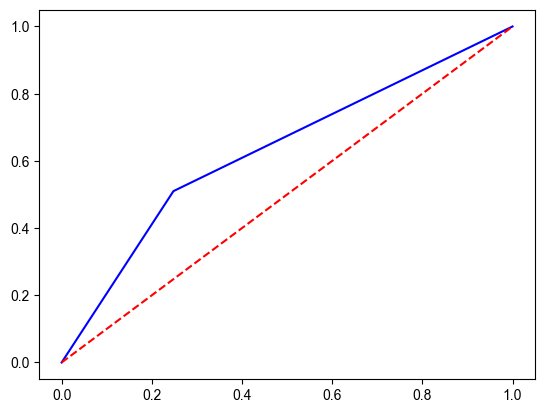

In [97]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,c='b',label='roc曲线')
plt.plot(fpr,fpr,c='r',ls='--')

# Output Rules

Graphviz executable 'dot' not found. Use sklearn.plot_tree fallback.


<Figure size 3200x1600 with 0 Axes>

[Text(0.5234375, 0.9285714285714286, 'STATE_NAME_CA <= 0.5\nentropy = 0.971\nsamples = 30566\nvalue = [18354, 12212]\nclass = Not Buy'),
 Text(0.27232142857142855, 0.7857142857142857, 'STATE_NAME_NY <= 0.5\nentropy = 0.996\nsamples = 22389\nvalue = [12051, 10338]\nclass = Not Buy'),
 Text(0.3978794642857143, 0.8571428571428572, 'True  '),
 Text(0.14285714285714285, 0.6428571428571429, '14.0 <= 5.5\nentropy = 0.982\nsamples = 17835\nvalue = [10319, 7516]\nclass = Not Buy'),
 Text(0.07142857142857142, 0.5, '71.0 <= 67.5\nentropy = 0.997\nsamples = 3554\nvalue = [1654, 1900]\nclass = Buy'),
 Text(0.03571428571428571, 0.35714285714285715, 'c210pmr <= 40.5\nentropy = 0.944\nsamples = 952\nvalue = [344, 608]\nclass = Buy'),
 Text(0.017857142857142856, 0.21428571428571427, 'pdpe <= 54.5\nentropy = 0.83\nsamples = 381\nvalue = [100, 281]\nclass = Buy'),
 Text(0.008928571428571428, 0.07142857142857142, 'entropy = 0.939\nsamples = 146\nvalue = [52, 94]\nclass = Buy'),
 Text(0.026785714285714284,

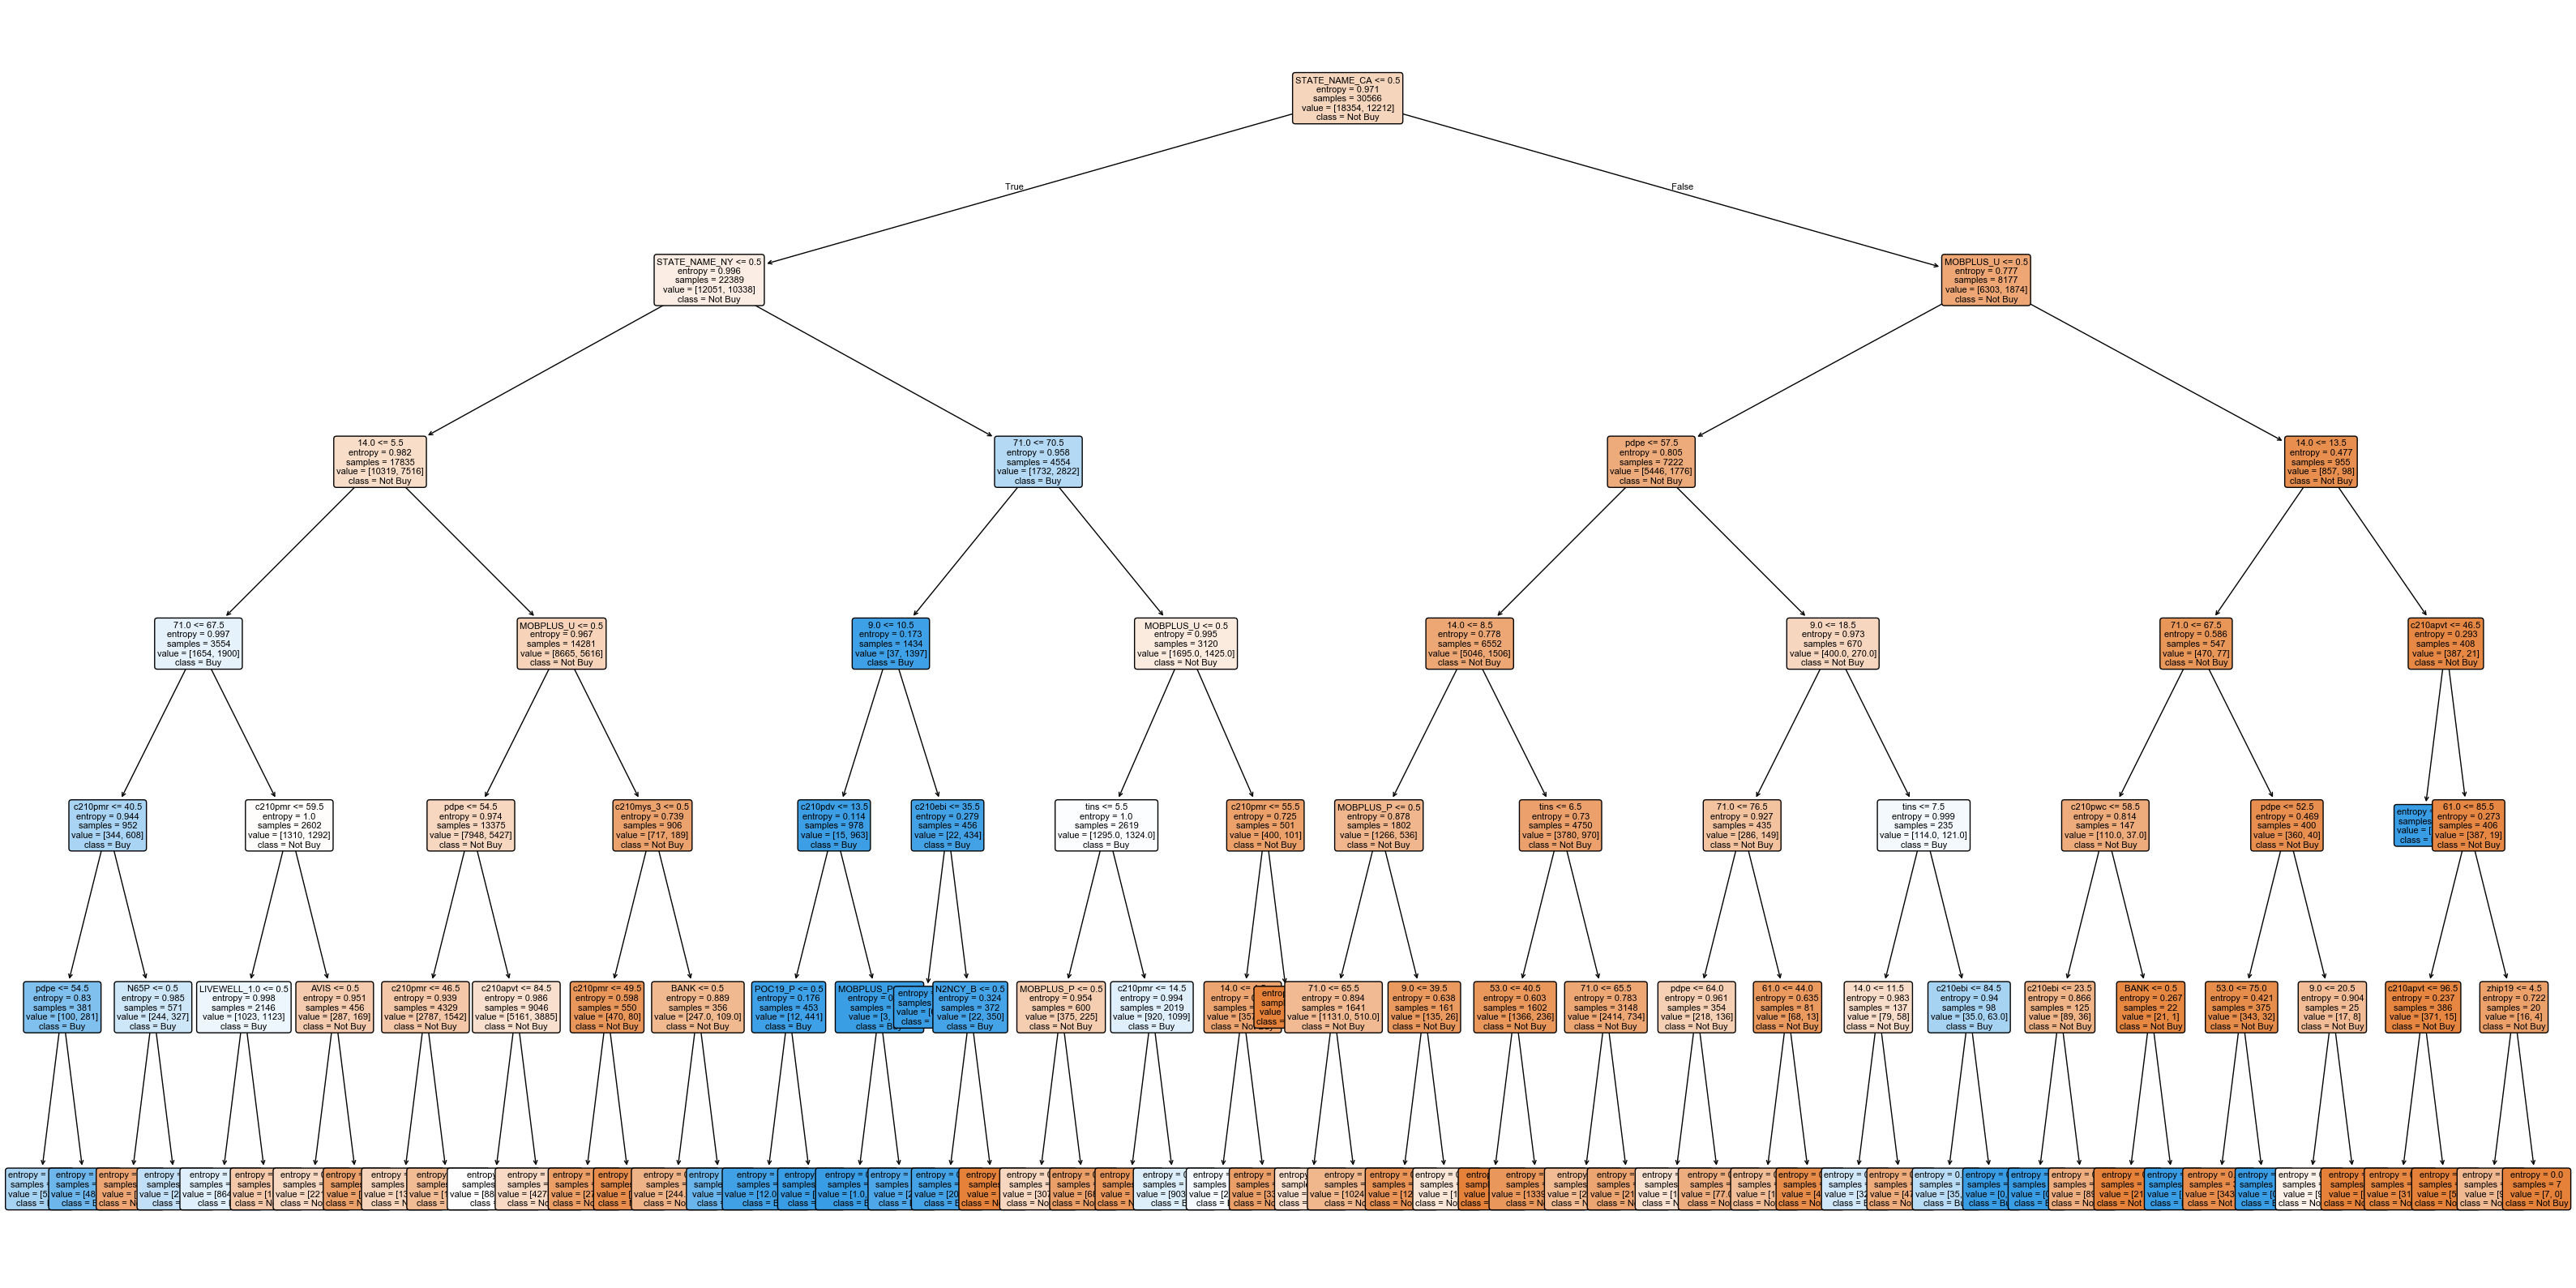

In [98]:
#Best parameters
#{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

from pydotplus.graphviz import graph_from_dot_data
import os
import shutil

dot_path = shutil.which('dot')
if dot_path:
    dot_bin = os.path.dirname(dot_path)
    if dot_bin not in os.environ.get('PATH', ''):
        os.environ['PATH'] += os.pathsep + dot_bin

#Set best parameters into the classifier
clf = DecisionTreeClassifier(criterion='entropy',max_depth=6,splitter='best')
clf = clf.fit(Xtrain_05,Ytrain)

features = Xtrain_05.columns
dot_data = tree.export_graphviz(clf,
                     feature_names=features,
                     class_names=['Not Buy','Buy'],
                     filled=True,
                     rounded=True,
                     leaves_parallel=False)

graph = graph_from_dot_data(dot_data.replace('helvetica', 'Arial'))
if dot_path:
    graph.write_png('decision_tree.png')
else:
    print("Graphviz executable 'dot' not found. Use sklearn.plot_tree fallback.")
    plt.figure(figsize=(32, 16))
    tree.plot_tree(clf, feature_names=features, class_names=['Not Buy','Buy'], filled=True, rounded=True, fontsize=8)
    plt.tight_layout()
    plt.savefig('decision_tree.png', dpi=200)
    plt.show()
graph
